#### Decision Tree Regressor Model Practice

In [1]:
import pandas as pd

In [2]:
melb_data_file_path = '../../Datasets/melb_data.csv'
melb_data = pd.read_csv(melb_data_file_path)

melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
melb_data = melb_data.dropna(axis=0)
# melb_data.describe()

In [5]:
# Prediction Target [denoted with 'y']
y = melb_data.Price

# Features [denoted with 'X']
# Features are the inputs / independent variables we use to make predictions of y [the output / dependent variable / target]

melb_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melb_data[melb_features]

X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


### Decision Tree Regressor

https://towardsdatascience.com/decision-tree-regressor-explained-a-visual-guide-with-code-examples-fbd2836c3bef/

In [6]:
from sklearn.tree import DecisionTreeRegressor

# ML Models allow some randomness in training. Specifying a random state ensures we get the same results each time we run the code.
melbourne_model = DecisionTreeRegressor(random_state=1)

melbourne_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


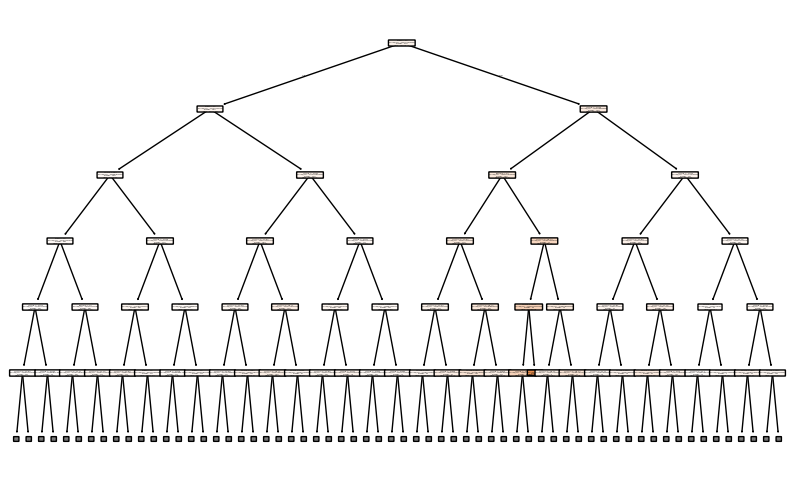

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))

plot_tree(
    melbourne_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=5
)

# Visualize the decision tree
plt.show()

In [8]:
print("Making predictions for the following 5 houses:\n")
print(X.head())

print("\nThe predictions are:\n")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:

   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954

The predictions are:

[1035000. 1465000. 1600000. 1876000. 1636000.]


### Problem of Decision Tree Regressor - Overfits too easily

Instead of learning the pattern, the model kind of memorizes the dataset. It perform too well on training data, but poorly on new, unseen dataset

In [9]:
# Model Validation
from sklearn.model_selection import train_test_split


# Default is 75% train, 25% validation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

melbourne_model_eval = DecisionTreeRegressor()
melbourne_model_eval.fit(train_X, train_y)

val_predictions = melbourne_model_eval.predict(val_X)

In [10]:
from sklearn.metrics import mean_absolute_error

val_mae = mean_absolute_error(val_y, val_predictions)
print("\nValidation MAE: {:,.0f}".format(val_mae))


Validation MAE: 258,623


In [11]:
prev_mae = mean_absolute_error(y, melbourne_model.predict(X))
print("Previous MAE (on training data): {:,.0f}".format(prev_mae))

Previous MAE (on training data): 1,116


#### MAE on full dataset prediction is $1,116 but $258,623 on unseen data

In [19]:
# MAE Scores by number of leaf nodes

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

for max_leaf_nodes in [5, 50, 500, 5000, 50000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: {:>5}  \t\t MAE: {:,.0f}".format(max_leaf_nodes, my_mae))

Max leaf nodes:     5  		 MAE: 369,673
Max leaf nodes:    50  		 MAE: 266,644
Max leaf nodes:   500  		 MAE: 244,780
Max leaf nodes:  5000  		 MAE: 257,788
Max leaf nodes: 50000  		 MAE: 257,788


Thus optimum number of maximum leaf nodes is = 500